In [ ]:
"""Макаров. Работа с файлами в Google Colab."""

## Работа с файлами в Google Colab

### Этап 1. Подгрузка файлов

Способ 1. Вручную через вкладку 'Файлы'

In [ ]:
# см. материалы урока на сайте

Способ 2. Через модуль files библиотеки google.colab

In [ ]:
# импортируем модуль os
import os

# импортируем библиотеку
import pandas as pd

# для построения графиков воспользуемся новой для нас библиотекой seaborn
import seaborn as sns

# из библиотеки google.colab импортируем класс files
from google.colab import files

# импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression

# импортируем метрику accuracy из sklearn
# построим матрицу ошибок
from sklearn.metrics import accuracy_score, confusion_matrix

# импортируем класс StandardScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
# создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
# посмотрим на содержимое словаря uploaded
uploaded

### Этап 2. Чтение файлов

#### Просмотр содержимого папки /content/

##### Модуль os и метод .walk()

In [1]:
# выводим пути к папкам (dirpath) и наименования файлов (filenames) и после этого
for dirpath, _, filenames in os.walk("/content/"):

    # во вложенном цикле проходимся по названиям файлов
    for filename in filenames:

        # и соединяем путь до папок и входящие в эти папки файлы
        # с помощью метода path.join()
        print(os.path.join(dirpath, filename))

##### Команда `!ls`

In [ ]:
# посмотрим на содержимое папки content
# !ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# заглянем внутрь sample_data
# !ls /content/sample_data/

anscombe.json		     california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv		   README.md


#### Чтение из переменной uploaded

In [ ]:
# посмотрим на тип значений словаря uploaded
type(uploaded["test.csv"])

bytes

Пример работы с объектом bytes

In [ ]:
# обратимся к ключу словаря uploaded и применим метод .decode()
uploaded_str = uploaded["test.csv"].decode()

# на выходе получаем обычную строку
print(type(uploaded_str))

<class 'str'>


In [ ]:
# выведем первые 35 значений
print(uploaded_str[:35])

PassengerId,Pclass,Name,Sex,Age,Sib


In [ ]:
# если разбить строку методом .split() по символам \r
# (возврат к началу строки) и \n (новая строка)
uploaded_list = uploaded_str.split("\r\n")

# на выходе мы получим список
type(uploaded_list)

list

In [ ]:
# пройдемся по этому списку, не забыв создать индекс с помощью функции enumerate()
for i, line in enumerate(uploaded_list):

    # начнем выводить записи
    print(line)

    # когда дойдем до четвертой строки
    if i == 3:

        # прервемся
        break

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q


#### Использование функции open() и конструкции with open()

In [ ]:
# передадим функции open() адрес файла
# параметр 'r' означает, что мы хотим прочитать (read) файл

# f1 = open("/content/train.csv", encoding="utf-8")

# метод .read() помещает весь файл в одну строку
# выведем первые 142 символа (если параметр не указывать, выведется все содержимое)
# print(f1.read(142))

# в конце файл необходимо закрыть
# f1.close()

with open("/content/train.csv", encoding="utf-8") as f1:
    print(f1.read(142))

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S



In [ ]:
# снова откроем файл
# f2 = open("/content/train.csv", encoding="utf-8")

# пройдемся по нашему объекту в цикле for и параллельно создадим индекс
# for index, line in enumerate(f2):

# выведем строки без служебных символов по краям
# print(line.strip())

# дойдя до четвертой строки, прервемся
# if index == 3:
#     break

# не забудем закрыть файл
# f2.close()

with open("/content/train.csv", encoding="utf-8") as f2:
    for index, line in enumerate(f2):
        print(line.strip())

        if index == 3:
            break

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S


In [ ]:
# скажем Питону: "открой файл  и назови его f3"
with open("/content/test.csv", encoding="utf-8") as f3:

    # "пройдись по строкам без служебных символов"
    for index, line in enumerate(f3):
        print(line.strip())

        # и "прервись на четвертой строке"
        if index == 3:
            break

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q


#### Чтение через библиотеку Pandas

In [ ]:
# применим функцию read_csv() и посмотрим на первые три записи файла train.csv
train = pd.read_csv("/content/train.csv")
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
# сделаем то же самое с файлом test.csv
test = pd.read_csv("/content/test.csv")
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


### Этап 3. Построение модели и прогноз

#### **Шаг 1**. Обработка и анализ данных

Исследовательский анализ данных (EDA)

In [ ]:
# посмотрим на данные в целом
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Pclass', ylabel='count'>

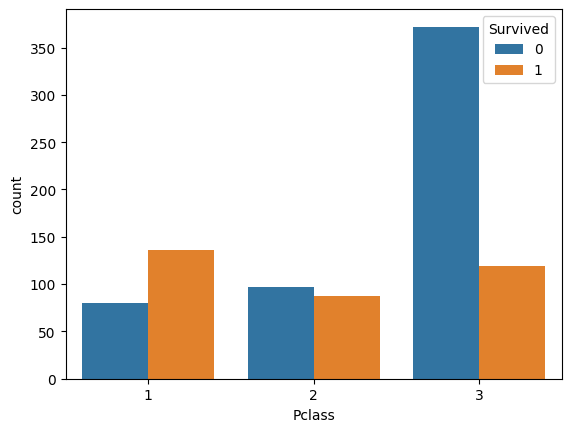

In [ ]:
# посмотрим насколько значим класс билета для выживания пассажира
# с помощью x и hue мы можем уместить две категориальные переменные на одном графике
sns.countplot(x="Pclass", hue="Survived", data=train)

<Axes: xlabel='Sex', ylabel='count'>

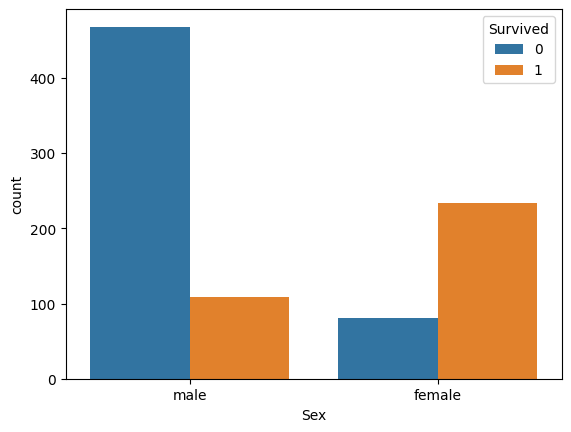

In [ ]:
# кто выживал чаще, мужчины или женщины?
sns.countplot(x="Sex", hue="Survived", data=train)

Пропущенные значения

In [ ]:
# выявим пропущенные значения с помощью .isnull() и посчитаем их количество через sum()
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# переменная Cabin (номер каюты), скорее всего, не является самой важной
# избавимся от нее с помощью метода .drop()
# (параметр axis = 1 отвечает за столбцы, inplace = True сохраняет изменения)
train.drop(columns="Cabin", axis=1, inplace=True)

In [ ]:
# а вот Age (возраст) скорее важен, заменим пустые значения средним арифметическим
train["Age"] = train["Age"].fillna(train["Age"].mean())

In [ ]:
# у нас остаются две пустые строки в Embarked, удалим их
train.dropna(inplace=True)

In [ ]:
# посмотрим на результат
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Категориальные переменные

In [ ]:
# применим one-hot encoding к переменной Sex (пол) с помощью функции pd.get_dummies()
pd.get_dummies(train["Sex"]).head(3)

,female,male
0,False,True
1,True,False
2,True,False


In [ ]:
# снова скачаем столбец Sex из датасета train в формате датафрейма
previous = pd.read_csv("/content/train.csv")[["Sex"]]
previous.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [ ]:
# закодируем переменную через 0 и 1
pd.get_dummies(previous["Sex"], dtype=int).head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [ ]:
# удалим первый столбец, он избыточен
sex = pd.get_dummies(train["Sex"], drop_first=True)
sex.head(3)

,male
0,True
1,False
2,False


In [ ]:
# сделаем то же самое для переменных Pclass и Embarked
embarked = pd.get_dummies(train["Embarked"], drop_first=True)
pclass = pd.get_dummies(train["Pclass"], drop_first=True)

In [ ]:
# присоединим закодированные через one-hot encoding переменные
# к исходному датафрейму через функцию .concat()
train = pd.concat([train, pclass, sex, embarked], axis=1)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,True,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,True,False,False,True


Отбор признаков

In [ ]:
# удалим те столбцы, которые нам теперь не нужны
train.drop(
    ["PassengerId", "Pclass", "Name", "Sex", "Ticket", "Embarked"],
    axis=1,
    inplace=True,
)
train.head(3)

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,False,True,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,True,False,False,True


Нормализация данных

In [ ]:
# создадим объект этого класса
scaler = StandardScaler()

# выберем те столбцы, которые мы хотим масштабировать
cols_to_scale = ["Age", "Fare"]

# рассчитаем среднее арифметическое и СКО для масштабирования данных
scaler.fit(train[cols_to_scale])

# применим их
train[cols_to_scale] = scaler.transform(train[cols_to_scale])

# посмотрим на результат
train.head(3)

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,-0.590495,1,0,-0.500240,False,True,True,False,True
1,1,0.643971,1,0,0.788947,False,False,False,False,False
2,1,-0.281878,0,0,-0.486650,False,True,False,False,True


In [ ]:
# некоторые названия столбцов теперь представляют собой числа,
# так быть не должно
train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 2, 3, 'male', 'Q', 'S'], dtype='object')

In [ ]:
# преобразуем эти переменные в тип str через функцию map()
train.columns = train.columns.map(str)
train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', '2', '3', 'male', 'Q',
       'S'],
      dtype='object')

#### **Шаг 2**. Разделение обучающей выборки на признаки (X_train) и целевую переменную (y_train)

In [ ]:
# поместим в X_train все кроме столбца Survived
X_train = train.drop("Survived", axis=1)

# столбец 'Survived' станет нашей целевой переменной (y_train)
y_train = train["Survived"]

In [ ]:
X_train.head(3)

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,-0.590495,1,0,-0.500240,False,True,True,False,True
1,0.643971,1,0,0.788947,False,False,False,False,False
2,-0.281878,0,0,-0.486650,False,True,False,False,True


#### **Шаг 3**. Обучение модели логистической регрессии

Обучим модель

In [ ]:
# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()

# обучим нашу модель
model.fit(X_train, y_train)

LogisticRegression()

Сделаем прогноз на обучающей выборке

In [ ]:
# сделаем предсказание класса на обучающей выборке
y_pred_train = model.predict(X_train)

Оценка качества модели на обучающей выборке

In [ ]:
# передадим ей фактические и прогнозные значения
conf_matrix = confusion_matrix(y_train, y_pred_train)

# преобразуем в датафрейм
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

,0,1
0,479,70
1,103,237


In [ ]:
# для удобства можем добавить подписи
conf_matrix_labels = pd.DataFrame(
    conf_matrix,
    columns=["Прогноз погиб", "Прогноз выжил"],
    index=["Факт погиб", "Факт выжил"],
)
conf_matrix_labels

,Прогноз погиб,Прогноз выжил
Факт погиб,479,70
Факт выжил,103,237


In [ ]:
# рассчитаем метрику accuracy вручную
round((479 + 237) / (479 + 237 + 70 + 103), 3)

0.805

In [ ]:
# так же передадим ей фактические и прогнозные значения
model_accuracy = accuracy_score(y_train, y_pred_train)

# округлим до трех знаков после запятой
round(model_accuracy, 3)

0.805

#### **Шаг 4**. Построение прогноза на тестовой выборке

In [ ]:
# посмотрим на тестовые данные
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [ ]:
# теперь нам нужно создать тестовую выборку с теми же признаками
# и для начала дадим датасету привычное название
X_test = test

In [ ]:
# заполним пропуски в переменных Age и Fare средним арифметическим
X_test["Age"] = X_test["Age"].fillna(test["Age"].mean())
X_test["Fare"] = X_test["Fare"].fillna(test["Fare"].mean())

In [ ]:
# выполним one-hot encoding категориальных переменных
sex = pd.get_dummies(X_test["Sex"], drop_first=True)
embarked = pd.get_dummies(X_test["Embarked"], drop_first=True)
pclass = pd.get_dummies(X_test["Pclass"], drop_first=True)

In [ ]:
# присоединим новые столбцы к исходному датафрейму
X_test = pd.concat([test, pclass, sex, embarked], axis=1)

# и удалим данные, которые теперь не нужны
X_test.drop(
    ["PassengerId", "Pclass", "Name", "Sex", "Cabin", "Ticket", "Embarked"],
    axis=1,
    inplace=True,
)

# посмотрим на результат
X_test.head(3)

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,34.5,0,0,7.8292,False,True,True,True,False
1,47.0,1,0,7.0000,False,True,False,False,True
2,62.0,0,0,9.6875,True,False,True,True,False


In [ ]:
# применим среднее арифметическое и СКО обучающей выборки
# для масштабирования тестовых данных
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.head(3)

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0.373932,0,0,-0.488579,False,True,True,True,False
1,1.338358,1,0,-0.505273,False,True,False,False,True
2,2.495670,0,0,-0.451165,True,False,True,True,False


In [ ]:
# превратим названия столбцов в строки
X_test.columns = X_test.columns.map(str)

In [ ]:
# сделаем прогноз на тестовой выборке
y_pred_test = model.predict(X_test)

In [ ]:
# посмотрим на первые 10 прогнозных значений
y_pred_test[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

### Этап 4. Сохранение нового файла на сервере Google

Пример оформления результата

In [ ]:
# файл с примером можно загрузить не с локального компьютера, а из Интернета
url = "https://www.dmitrymakarov.ru/wp-content/uploads/2021/11/titanic_example.csv"

# просто поместим его url в функцию read_csv()
example = pd.read_csv(url)
example.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


Создание файла с прогнозом

In [ ]:
# возьмем индекс пассажиров из столбца PassengerId тестовой выборки
ids = test["PassengerId"]

# создадим датафрейм из словаря, в котором
# первая пара ключа и значения - это id пассажира, вторая - прогноз "на тесте"
result = pd.DataFrame({"PassengerId": ids, "Survived": y_pred_test})

# посмотрим, что получилось
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
# создадим новый файл result.csv с помощью функции to_csv(),
# удалив при этом индекс
result.to_csv("result.csv", index=False)

# файл будет сохранен в 'Сессионном хранилище' и,
# если все пройдет успешно, выведем следующий текст:
print("Файл успешно сохранился в сессионное хранилище!")

Файл успешно сохранился в сессионное хранилище!


### Этап 5. Скачивание обратно на жесткий диск

In [ ]:
# применим метод .download() объекта files
files.download("/content/result.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>